In [271]:
import pandas as pd
import seaborn as sns

### Задание 1. Загружаем данные в датафрейм

In [272]:
df = pd.read_csv('HR.csv') # Откроем датасет


In [273]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Задание 2. Рассчитайте основные статистики для переменных

In [274]:
df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [275]:
# рассчитаем дополнительно моду

In [276]:
df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [277]:
df[['promotion_last_5years']].value_counts()

promotion_last_5years
0                        14680
1                          319
dtype: int64

In [278]:
df[['Work_accident']].value_counts()

Work_accident
0                12830
1                 2169
dtype: int64

In [279]:
df[['left']].value_counts()

left
0       11428
1        3571
dtype: int64

In [280]:
df[['salary']].value_counts()

salary
low       7316
medium    6446
high      1237
dtype: int64

In [281]:
# медиана
df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [282]:
# пока можно сказать, что сотрудники неочень удовлетворены своей компанией. в среднем на 60%, а мода так вообще 10% (наиболее часто встречающееся значение)
# работают в компании в среднем по 3 кода и делают в среднем по 4 проекта
# может потому что за последние 5 лет только 319 человек получали повышение и большинсво зарплат ниже среднего

### Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

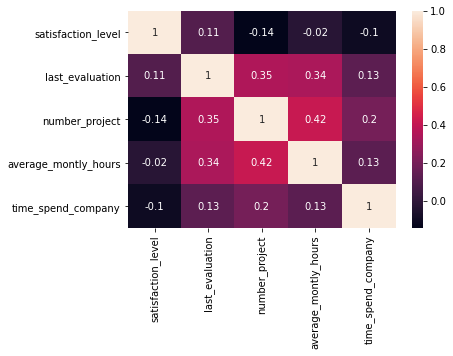

In [283]:
sns.heatmap(df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(), annot = True)

In [284]:
# 2 самые скоррелированные - это среднее в месяц количество часов проведенные на работе и количество проектов.
# наименее  - уровень удовлетворенности и среднее в месяц количество часов проведенные на работе. 

### Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [285]:
df[['department']].value_counts()

department 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

### Задание 5. Показать распределение сотрудников по зарплатам.

In [286]:
df[['salary']].value_counts()

salary
low       7316
medium    6446
high      1237
dtype: int64

### Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [287]:
df.groupby(['department','salary']).size().reset_index(name='counts').pivot(index='department', columns='salary', values='counts')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [288]:
# удивительно, но низких зарплат везде больше кроме отделов менеджеров и hr

### Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [289]:
df_sal = df[['salary','average_montly_hours']]

In [290]:
df_sal_low = df_sal[df_sal.salary == 'low'].average_montly_hours
df_sal_high = df_sal[df_sal.salary == 'high'].average_montly_hours

In [291]:
df_sal_low.mean()

200.9965828321487

In [292]:
df_sal_high.mean()

199.86742118027485

In [293]:
from scipy import stats

In [294]:
# по средним значениям время почти одинаковое, даже у сотрудников с большей зарплатой чуть меньше
# нулевая гипотиза : sal_low >= sal_high 
# альтернативная гипотиза : sal_high > sal_low 

t,p = stats.ttest_ind(df_sal_high, df_sal_low)
t,p

(-0.7288680398062308, 0.4661023478267259)

In [295]:
# поскольку p/2 (0.233)  > a (0.05) , мы не можем отвергнуть нулевую гипотизу, а значит сотрудники с низкой зарплатой проводят на работе больше или столько же времени

### Задание 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов

In [296]:
df_left = df[df.left == True] # уволившиеся сотрудники
df_nonleft = df[df.left == False] # осташиеся сотрудники

In [297]:
left_per = df_left[df_left.promotion_last_5years == True].left.count()/len(df_left)*100
print('Доля сотрудников с повышением среди уволившихся: ',round(left_per,2),'%')

Доля сотрудников с повышением среди уволившихся:  0.53 %


In [298]:
nonleft_per = df_nonleft[df_nonleft.promotion_last_5years == True].left.count()/len(df_nonleft)*100
print('Доля сотрудников с повышением среди оставшихся: ',round(nonleft_per,2),'%')

Доля сотрудников с повышением среди оставшихся:  2.63 %


In [299]:
# средняя степень удовлетворенности у оставшихся сотрудников 66%, а у уволившихся 44%
df_left.satisfaction_level.mean()

0.44009801176140917

In [300]:
df_nonleft.satisfaction_level.mean()

0.666809590479516

In [301]:
# а среднее количество проектов у уволившихся чуть выше, чем у оставшихся
df_left.number_project.mean()

3.8555026603192384

In [302]:
df_nonleft.number_project.mean()

3.786664333216661

### Задание 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary) Оценить качество модели на тестовой выборки

In [359]:
data = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']]
data_class = df.left

In [360]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.40, random_state=42)

In [361]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [362]:
lda = LinearDiscriminantAnalysis()

In [363]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [364]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [365]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, y_pred]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
5995,0,1
5996,0,0
5997,1,0
5998,0,0


In [366]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score


In [367]:
accuracy_score(y_test.values, lda.predict(X_test))

0.7573333333333333

In [368]:
# Итак модель может "предсказать" уволился ли сотрудник где-то с 76% точностью